## Reto 4: Las mejores 50

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - Agrupaciones y reducciones
        - Reordenamiento
        - Unión de `DataFrames` usando `merge`
    
---
    
### 2. Desarrollo:

#### a) Las 50 películas con mejor rating

Vamos a hacer una visualización muy sencilla de las 50 películas que tienen mejor rating en nuestro dataset. Tu Reto consiste en seguir los siguientes pasos:

1. Lee los archivos `movies` y `ratings`.
2. Agrupa `ratings` por id de película y computa el promedio de `rating` para cada película
3. Crea un nuevo `DataFrame` que sólo contenga las 50 películas con mejor promedio de ratings
4. Agrega al `DataFrame` anterior los nombres de las películas usando la tabla `movies`.
5. Al final tendrás un `DataFrame` con los nombres de las 50 películas con mejor rating ('title') y el promedio de sus ratings ('rating'). Asigna este resultado a la variable `las_mejores_50`.

In [13]:
# Importamos librerías
import pandas as pd

In [14]:
# Tu código va aquí
#1. Lee los archivos `movies` y `ratings`.
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep= '$', index_col= 0)
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv', index_col= 0)

In [15]:
movies.head()

,title,genres
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [16]:
ratings.head()

,movie_id,rating,timestamp
user_id,,,
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291


In [17]:
# El tamaño de los dataframes
print(f'El df movies tiene {movies.shape[0]} columnas y {movies.shape[1]} filas')
print(f'El df ratings tiene {ratings.shape[0]} columnas y {ratings.shape[1]} filas')


El df movies tiene 3882 columnas y 2 filas
El df ratings tiene 1000209 columnas y 3 filas


In [18]:
# 2. Agrupa `ratings` por id de película y computa el promedio de `rating` para cada película
ratings.groupby('movie_id').mean().sort_values('rating', ascending= False)

,rating,timestamp
movie_id,,
3280,5.0,977979487.0
3233,5.0,966424573.5
3607,5.0,957756608.0
3382,5.0,960796159.0
3881,5.0,972452947.0
...,...,...
3123,1.0,960996402.0
3376,1.0,974825679.0
3237,1.0,967133420.0


In [19]:

# 3. Crea un nuevo `DataFrame` que sólo contenga las 50 películas con mejor promedio de ratings
best_50_movies = ratings.groupby('movie_id').mean().sort_values('rating', ascending= False).head(50)

best_50_movies.head(5)

,rating,timestamp
movie_id,,
3280,5.0,977979487.0
3233,5.0,966424573.5
3607,5.0,957756608.0
3382,5.0,960796159.0
3881,5.0,972452947.0


In [20]:

# 4. Agrega al `DataFrame` anterior los nombres de las películas usando la tabla `movies`.
best_50_movies = pd.merge(best_50_movies, movies, left_on= 'movie_id', right_index= True)

best_50_movies.head(10)

,rating,timestamp,title,genres
movie_id,,,,
3280,5.0,9.779795e+08,"Baby, The (1973)",Horror
3233,5.0,9.664246e+08,Smashing Time (1967),Comedy
3607,5.0,9.577566e+08,One Little Indian (1973),Comedy|Drama|Western
3382,5.0,9.607962e+08,Song of Freedom (1936),Drama
3881,5.0,9.724529e+08,Bittersweet Motel (2000),Documentary
989,5.0,9.746939e+08,Schlafes Bruder (Brother of Sleep) (1995),Drama
3656,5.0,9.609204e+08,Lured (1947),Crime
3172,5.0,9.670604e+08,Ulysses (Ulisse) (1954),Adventure
1830,5.0,9.724390e+08,Follow the Bitch (1998),Comedy


In [21]:

# 5. Al final tendrás un `DataFrame` con los nombres de las 50 películas con mejor rating ('title') 
# y el promedio de sus ratings ('rating'). Asigna este resultado a la variable `las_mejores_50`.
las_mejores_50 = best_50_movies.copy()


Pídele a tu experta la función de verificación `plotting_best_50` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado:

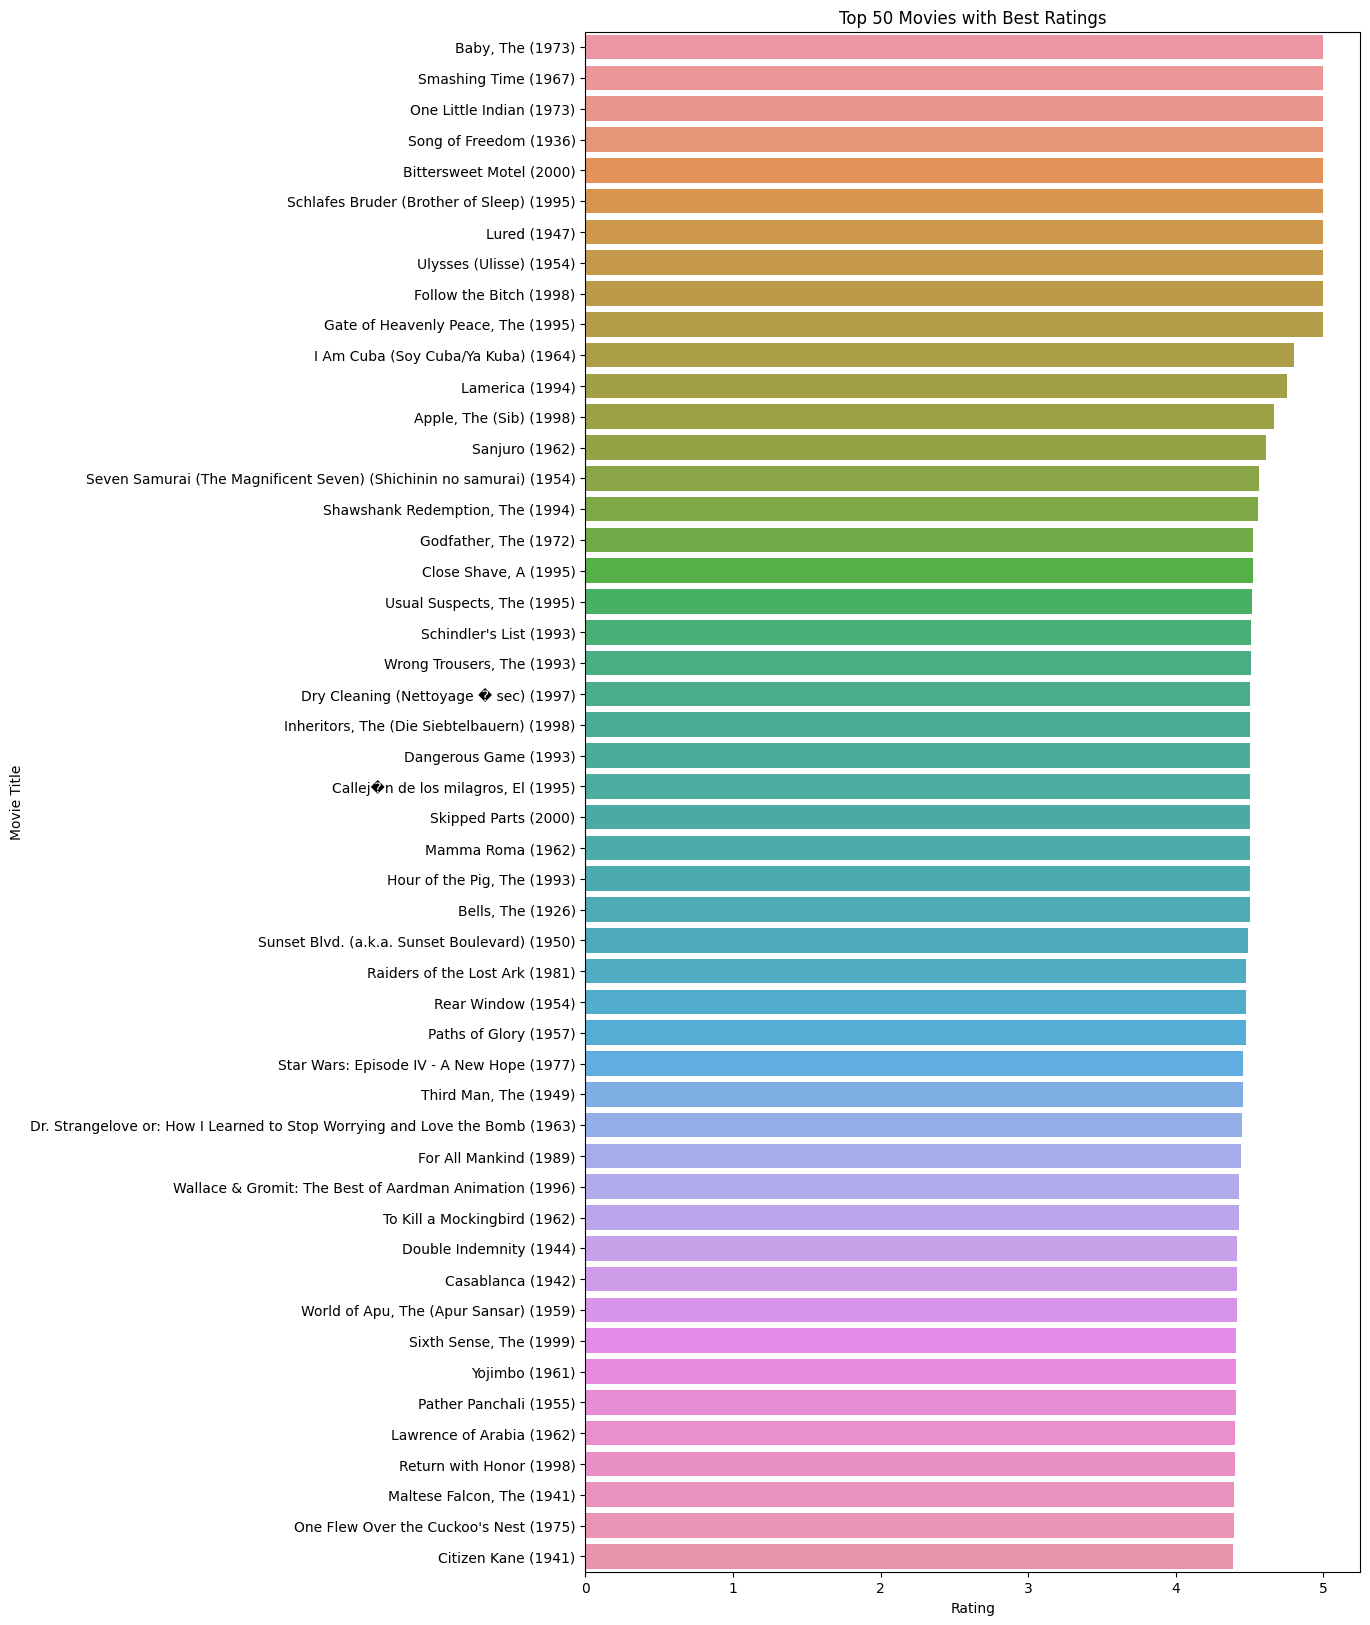

In [23]:
# Pega aquí la función de verificación
def plotting_best_50(las_mejores_50):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10, 20))
    ax.set_title('Top 50 Movies with Best Ratings')
    splot = sns.barplot(data= las_mejores_50, x= 'rating', y= 'title', ax=ax)
    ax.set(xlabel='Rating', ylabel='Movie Title')

plotting_best_50(las_mejores_50)

<details><summary>Solución</summary>

```python
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep='$', index_col=0)
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv', index_col=0)
means_of_ratings = ratings.groupby('movie_id')['rating'].mean()
means_of_ratings_top_50 = means_of_ratings.sort_values(ascending=False).head(50)
las_mejores_50 = pd.merge(means_of_ratings_top_50, movies, left_index=True, right_on='movie_id')
```
    
</details>